In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the data
boston_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Training_set_boston.csv")
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,12.0
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,19.9
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,13.4
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,18.2


In [3]:
#Separate the features and target label
features = boston_data.iloc[:, :-1]
med_val = boston_data['MEDV'].values

In [4]:
#Get the details of features 
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
1,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
2,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
3,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
4,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [5]:
#Get the description about the features
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
#Separate the data for training and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(features, med_val, train_size = 0.8, random_state = 42)
print(X_train.shape)
print(X_val.shape)

(323, 13)
(81, 13)


In [7]:
#Build a Linear Regression using all the features
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [8]:
#Predict for validation data
y_pred = model.predict(X_val)

In [9]:
#Get the mse score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_val))

23.286438054785098


### As we will try different data, let's create a function that takes the data (Features and medval) and give mse

In [10]:
#Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Function to calculate mse for given features and medval
def cal_mse(features, medval):
    
    #Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, medval, train_size = 0.8, random_state = 42)
    
    #Create a model
    lr = LinearRegression()
    model = lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_pred, y_test)

### As MSE score is high, we will try excluding different features that are not useful

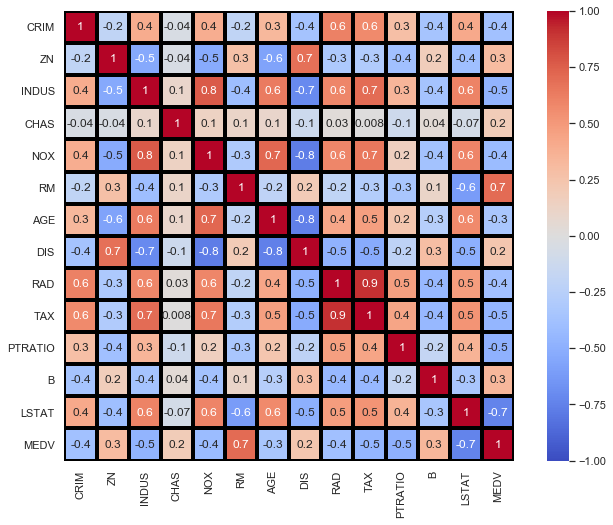

In [11]:
#Get the correlation matrix
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston_data.corr(), annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', linewidth = 3, linecolor = 'black', square = True)

In [12]:
#Select only features with correlation >= 0.5 with MedValues
features_ = features[['INDUS', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
features_.head()

,INDUS,RM,TAX,PTRATIO,LSTAT
0,18.10,5.304,666.0,20.2,24.91
1,8.14,5.834,307.0,21.0,8.47
2,6.06,6.031,304.0,16.9,7.83
3,18.10,6.103,666.0,20.2,23.29
4,8.14,5.727,307.0,21.0,11.28


In [13]:
#Get the mse for new features
mse = cal_mse(features_, med_val)
print("MSE: ", mse)

MSE:  27.392605495765718


# We will do feature selection by two methods: Correlation statistics and Mutual Information Statistics

## Correlation statistics

In [14]:
#Import the libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


#Define a function to get the features
def feature_selection_corr(X_train, y_train, X_test):
    
    #We tried giving all features, lets try with 7 features
    fs = SelectKBest(score_func = f_regression, k = 7)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

"Feature 0: 47.72698690556391"
"Feature 1: 29.33471167394956"
"Feature 2: 86.24185355682626"
"Feature 3: 11.482760861739049"
"Feature 4: 60.00936281054554"
"Feature 5: 374.1685491418967"
"Feature 6: 35.875279956124146"
"Feature 7: 13.936922525161492"
"Feature 8: 56.74154104565325"
"Feature 9: 85.93369859983662"
"Feature 10: 106.08345115308015"
"Feature 11: 45.39667879324308"
"Feature 12: 362.96447773316453"


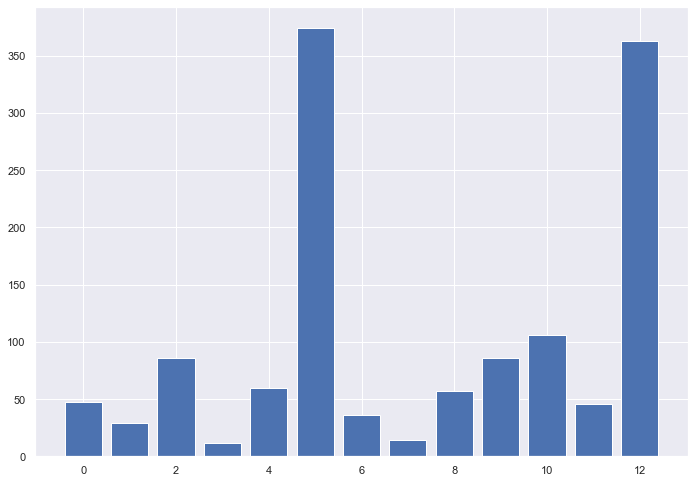

In [15]:
#Split the data in training, validation
X_train, X_val, y_train, y_test = train_test_split(features, med_val, train_size = 0.8, random_state = 42)

#Perform feature selection
X_train_fs, X_val_fs, fs = feature_selection_corr(X_train, y_train, X_val)

#Print the importance score of features
for i in range(len(fs.scores_)):
    print(f'"Feature {i}: {fs.scores_[i]}"')

#Plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [16]:
#Model using correlation features
lr = LinearRegression()
model = lr.fit(X_train_fs, y_train)
y_pred = model.predict(X_val_fs)
mse_score = mean_squared_error(y_pred, y_val)
print("MSE score: ", mse_score)

MSE score:  26.76880310842225


## Mutual Information Statistics

In [17]:
#Function for mutual info statistics
from sklearn.feature_selection import mutual_info_regression
def feature_selection_mutual(X_train, y_train, X_test):
    fs = SelectKBest(score_func = mutual_info_regression, k = 'all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs 

Feature 0: 0.347134
Feature 1: 0.142675
Feature 2: 0.485495
Feature 3: 0.014062
Feature 4: 0.446549
Feature 5: 0.544734
Feature 6: 0.311253
Feature 7: 0.262048
Feature 8: 0.229626
Feature 9: 0.313991
Feature 10: 0.514059
Feature 11: 0.160152
Feature 12: 0.689805


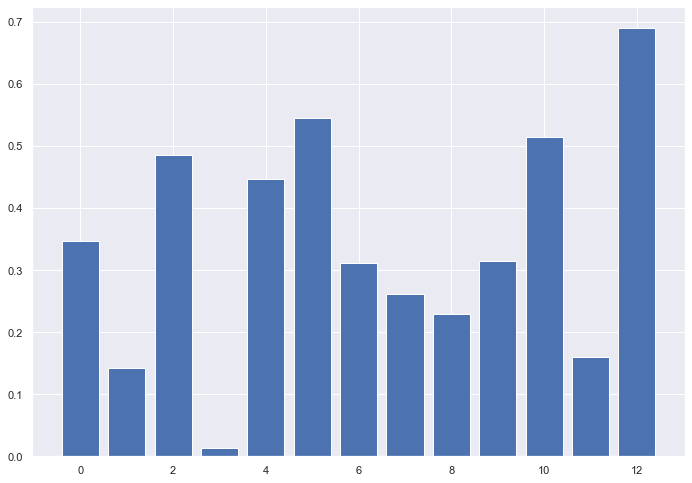

In [18]:
X_train_fs, X_val_fs, fs = feature_selection_mutual(X_train, y_train, X_val)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [19]:
lr = LinearRegression()
model = lr.fit(X_train_fs, y_train)
y_pred = model.predict(X_val_fs)
mse_score = mean_squared_error(y_pred, y_val)
print("MSE Score: ", mse_score)

MSE Score:  23.286438054785098


### As we saw, taking less features increased mse score, so we need to tune the number of features to be selected using repeated stratified k-fold cross validation

In [20]:
#Import the libraries
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Define the evaluation
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

#Define pipeline to evaluate
lr = LinearRegression()
fs = SelectKBest(score_func = mutual_info_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', lr)])

#Define the grid
grid = dict()
grid['sel__k'] = [i for i in range(1, features.shape[1])]
search = GridSearchCV(pipeline, grid, scoring = 'neg_mean_squared_error', n_jobs = -1, cv = cv)
results = search.fit(features, med_val)
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))


Best MAE: -24.289
Best Config: {'sel__k': 12}
>-40.268 with: {'sel__k': 1}
>-32.327 with: {'sel__k': 2}
>-30.867 with: {'sel__k': 3}
>-29.566 with: {'sel__k': 4}
>-28.543 with: {'sel__k': 5}
>-28.183 with: {'sel__k': 6}
>-27.974 with: {'sel__k': 7}
>-27.561 with: {'sel__k': 8}
>-25.948 with: {'sel__k': 9}
>-25.523 with: {'sel__k': 10}
>-25.065 with: {'sel__k': 11}
>-24.289 with: {'sel__k': 12}


### Thus we need all the features

In [21]:
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Boston_Housing/Testing_set_boston.csv')
eval_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27


In [22]:
lr = LinearRegression()
model = lr.fit(features, med_val)
y_pred = model.predict(eval_data)

In [23]:
print(y_pred)

[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620627 20

In [24]:
results = pd.DataFrame(y_pred, columns = ['prediction'])
results.to_csv('results.csv')